## Multiple Linear Regression
### Bike Sharing Rental Counts

In [25]:
import pandas as pd

### Step_1: Import and Understand Data

In [26]:
df = pd.read_csv("/Users/siddeg/Desktop/Bikeshare/Data/daily.csv")

In [27]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
# Type of data stored
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
# Let's look at some statistical information.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Step_2: Visualising Data

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [32]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


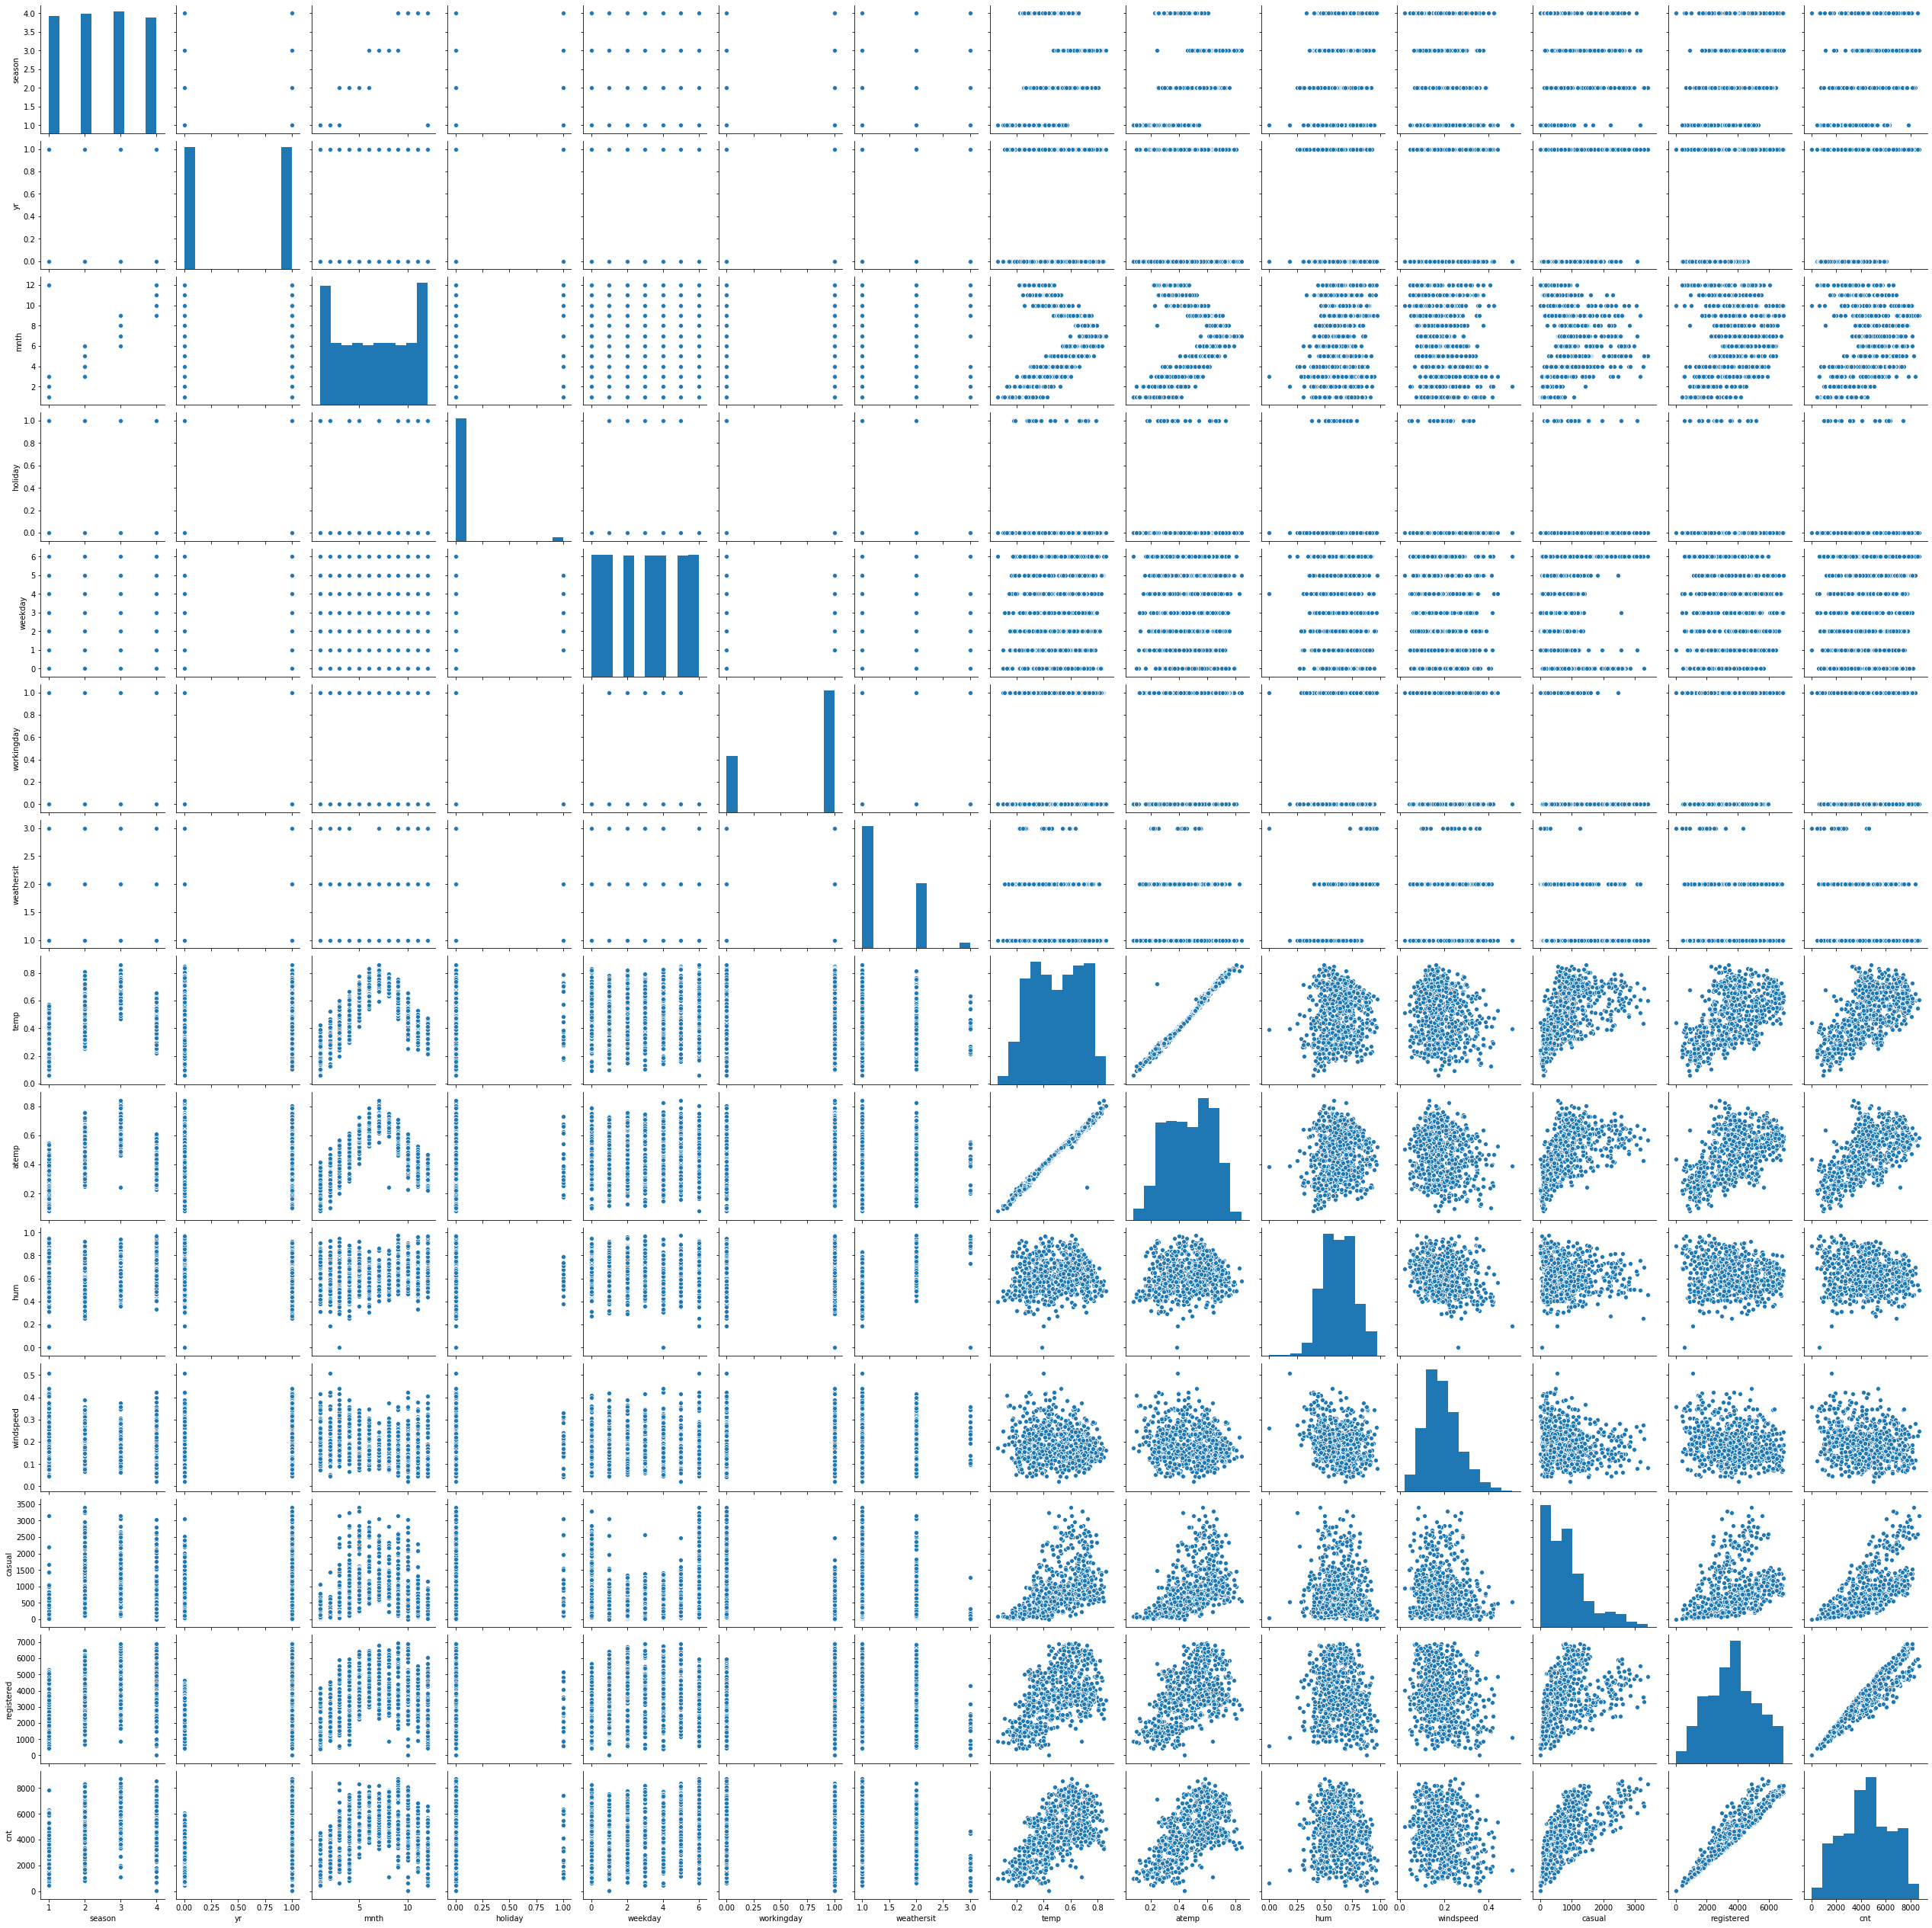

In [33]:
# Pair plot of all variables in our dataframe
sns.pairplot(df)

We can clearly see that there're close realationship between cnt and temp, atemp, registered, and casual

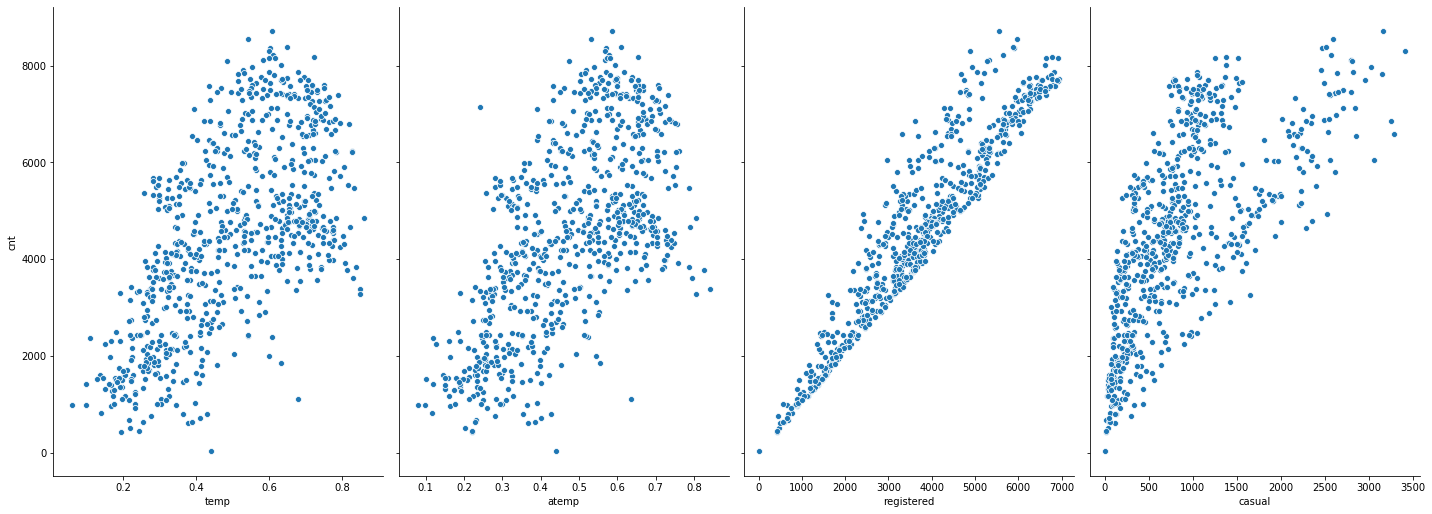

In [35]:
sns.pairplot(df, x_vars=['temp','atemp','registered', 'casual'], y_vars='cnt',size=7, aspect=0.7, kind='scatter')

### Step_3: Splitting the Data for Training and Testing

In [36]:
# Putting feature variable to X
X = df[['temp','atemp','registered', 'casual']]

# Putting response variable to y
y = df['cnt']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

### Step_4 : Perform Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Creating LinearRegression Object
lm = LinearRegression()

In [41]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step_5 : Evaluate The Model

In [42]:
# print the intercept
print(lm.intercept_)

2.7284841053187847e-12


In [43]:
# See the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
temp,-1.122028e-11
atemp,1.345279e-11
registered,1.000000e+00
casual,1.000000e+00


### Step_6 : Predictions

In [44]:
# Making predictions
y_pred = lm.predict(X_test)

### Step_7: Calculating Error Terms

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [46]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 2.3892624380022886e-24
r_square_value : 1.0


### Optional Step : Checking for P-value Using STATSMODELS

In [47]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const         2.842171e-12
temp          5.456968e-12
atemp        -1.091394e-11
registered    1.000000e+00
casual        1.000000e+00
dtype: float64

In [48]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.594e+31
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        03:10:55   Log-Likelihood:                 12921.
No. Observations:                 511   AIC:                        -2.583e+04
Df Residuals:                     506   BIC:                        -2.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.842e-12   3.87e-13      7.346      0.0

From the above result we can see that temp and atemp are insignificant.

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
check = df[['temp','atemp','registered', 'casual', 'cnt']]

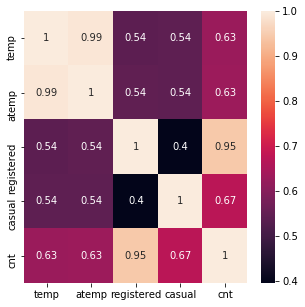

In [53]:
plt.figure(figsize = (5,5))
sns.heatmap(check.corr(),annot = True)

### Step_8 : Running the model again

In [64]:
# Removing temp and atemp from our dataset
X_train_new = X_train[['registered','casual']]
X_test_new = X_test[['registered','casual']]

In [65]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# Making predictions
y_pred_new = lm.predict(X_test_new)

Text(0, 0.5, 'Count')

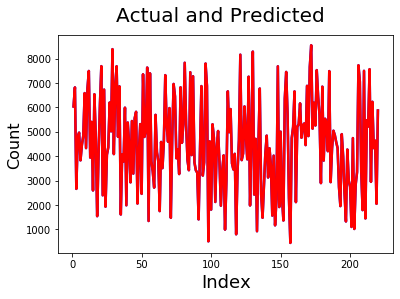

In [67]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)           
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

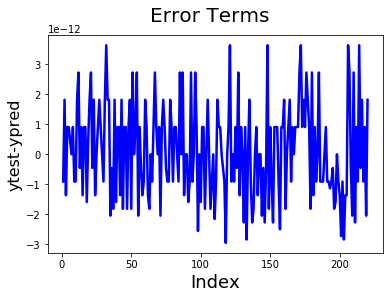

In [68]:
# Error terms
c = [i for i in range(1,221,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)    

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [70]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.2053014376627168e-24
r_square_value : 1.0
